In [19]:
import numpy as np
import glob
import pickle 
import csv
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab

from scipy import stats  

person_names = {0: "Andreea", 1: "Andrea", 2: "Eli", 3: "Ravi", 4: "Hong", 5: "Ellis", 6: "Steven", 7:"Smitha", 8:"Simon"}
corrections_str = []
for file in glob.glob('betas/*_BETA_*.p'):
    corrections_str.append(file)
    
csv_table = [["Name", "Features known by R", "Features corrected by H", "Rational", "Correction #", "Timestamp", "Update", "Beta1", "Beta2", "Beta3"]]
    
for file_path in corrections_str:
    # Parse string to find features known and features corrected
    print "Parsing this file:", file_path
    str_list = file_path.split("_")
    method_idx = str_list.index("BETA")
    correction_idx = str_list.index("correction")
    end_idx = len(str_list)-1
    
    person_ID = person_names[int(str_list[1])]
    features_known = str_list[method_idx+1:correction_idx]
    features_corrected = str_list[correction_idx+1:-1]
    is_rational = not set(features_known).isdisjoint(features_corrected)
            
    features_known_str = ",".join(features_known)
    features_corrected_str = ",".join(features_corrected)
    
    print "Name of human:", person_ID
    print "Robot knew about these features:", features_known
    print "Human was asked to correct these features:", features_corrected  
    print "Was human rational?", is_rational
    betas = pickle.load(open(file_path, "rb"))
    timestamp = betas[:,0]
    betas = betas[:,1:]
    print "Timestamp of pushes:", timestamp
    print "Beta values:", betas
  
    # Look at update data
    update_str = "updates/updates_" + ('_').join(str_list[1:])
    updates = pickle.load(open(update_str, "rb"))
    updates = updates[:,1:]
    print "Updates:", updates, "\n"
    
    # Create csv data
    csv_row = [person_ID, features_known_str[:], features_corrected_str[:]]

    for i in range(len(timestamp)):
        is_rational_i = is_rational
        if is_rational:
            if 'table' in features_known:
                feat_idx = features_known.index('table')
                if abs(updates[i,feat_idx]) < 0.1:
                    is_rational_i = False
            if 'coffee' in features_known:
                feat_idx = features_known.index('coffee')
                if abs(updates[i,feat_idx]) < 0.05:
                    is_rational_i = False
        csv_row_current = csv_row + [is_rational_i, i, timestamp[i]] + [updates[i,].tolist()] + betas[i,:].tolist() + [float('nan')]*(3-len(betas[i,:]))
        csv_table.append(csv_row_current)
    
csv_file = open('beta_pilot.csv', 'w')
with csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(csv_table)
    
df = pd.DataFrame(data=csv_table[:][1:], columns=csv_table[:][0])

Parsing this file: betas/betas_1_B_BETA_coffee_correction_human_1.p
Name of human: Andrea
Robot knew about these features: ['coffee']
Human was asked to correct these features: ['human']
Was human rational? False
Timestamp of pushes: [ 4.12439084  5.19154   ]
Beta values: [[ 0.02851216]
 [ 0.00347121]]
Updates: [[-0.16043026]
 [-0.11574803]] 

Parsing this file: betas/betas_2_B_BETA_coffee_correction_coffee_1.p
Name of human: Eli
Robot knew about these features: ['coffee']
Human was asked to correct these features: ['coffee']
Was human rational? True
Timestamp of pushes: [ 2.85364604  3.548491    4.18021917  4.83120203]
Beta values: [[  4.54219449e-01]
 [  2.40872908e+00]
 [  3.20277173e-02]
 [  1.21168327e-03]]
Updates: [[-0.17228468]
 [-0.93671548]
 [-0.19310743]
 [-0.02387313]] 

Parsing this file: betas/betas_4_B_BETA_table_correction_table_1.p
Name of human: Hong
Robot knew about these features: ['table']
Human was asked to correct these features: ['table']
Was human rational? Tru

In [20]:
# Create P(beta | intent, feature) from data

# intent = false, feature = table
P_beta_00 = df.loc[(df['Features known by R'] == 'table')&(df['Rational'] == False)]['Beta1']
print(P_beta_00)

# intent = true, feature = table
P_beta_10 = df.loc[(df['Features known by R'] == 'table')&(df['Rational'] == True)]['Beta1']
print(P_beta_10)

# intent = false, feature = coffee
P_beta_01 = df.loc[(df['Features known by R'] == 'coffee')&(df['Rational'] == False)]['Beta1']
print(P_beta_01)

# intent = true, feature = coffee
P_beta_11 = df.loc[(df['Features known by R'] == 'coffee')&(df['Rational'] == True)]['Beta1']
print(P_beta_11)

# intent = false, feature = human
P_beta_01 = df.loc[(df['Features known by R'] == 'human')&(df['Rational'] == False)]['Beta1']
print(P_beta_02)

# intent = true, feature = human
P_beta_11 = df.loc[(df['Features known by R'] == 'human')&(df['Rational'] == True)]['Beta1']
print(P_beta_12)


9       0.108622
10      0.073528
11      0.002673
12      0.002462
15      0.071583
16      0.091644
17      0.085207
18      0.017023
19      0.135724
20      0.024336
21      0.090562
24      0.013520
54      0.000971
56      0.000407
57      0.031753
58      0.062054
59      0.005849
60      0.001854
61      3.933140
62     12.455814
63      1.075631
64      0.110293
65      0.000205
66      0.021951
67      0.116066
79      0.071583
80      0.092082
81      0.085207
82      0.017021
83      0.150482
         ...    
126     0.001913
130     0.004535
131     0.089718
132     0.179991
133     0.000592
137     0.003325
138     0.015463
139     0.033304
140     0.022790
141     3.277450
142     0.047349
143     0.011014
144     0.792231
145     2.863951
146     0.468185
147     0.090906
148     0.310959
153     0.052877
164     0.055417
165     0.290995
166     0.103136
167     0.031518
168     0.002622
169     0.000033
170     0.042040
171     0.000190
172     0.003272
177     0.1063

NameError: name 'P_beta_02' is not defined

0.281229471102 0.785259743792


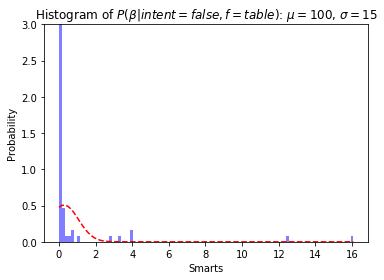

In [15]:
num_bins = 100
# the histogram of the data
n, bins, patches = plt.hist(P_beta_00, num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line after rejecting outliers
data = P_beta_00
data = data[abs(data - np.mean(data)) < 2 * np.std(data)]
mu, sigma = stats.norm.fit(data)
print mu,sigma
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of $P(\beta|intent=false,f=table)$: $\mu=100$, $\sigma=15$')
plt.ylim((0,3)) 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

1.03739176569 0.884690604024


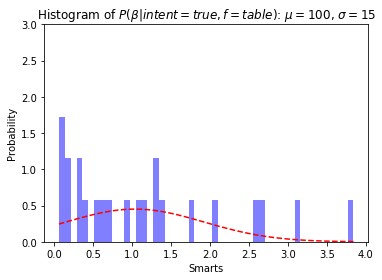

In [17]:
num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(P_beta_10, num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
data = P_beta_10
data = data[abs(data - np.mean(data)) < 2 * np.std(data)]
mu, sigma = stats.norm.fit(data)
print mu,sigma
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of $P(\beta|intent=true,f=table)$: $\mu=100$, $\sigma=15$')
plt.ylim((0,3)) 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

0.066663976825 0.145431535369


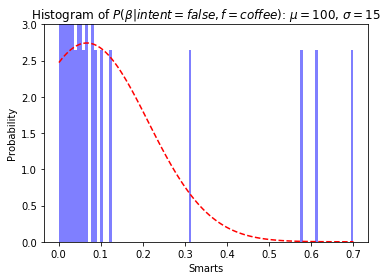

In [9]:
num_bins = 100
# the histogram of the data
n, bins, patches = plt.hist(P_beta_01, num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
data = P_beta_01
#data = data[abs(data - np.mean(data)) < 2 * np.std(data)]
mu, sigma = stats.norm.fit(data)
print mu,sigma
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of $P(\beta|intent=false,f=coffee)$: $\mu=100$, $\sigma=15$')
plt.ylim((0,3)) 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

1.34962872178 1.31424668516


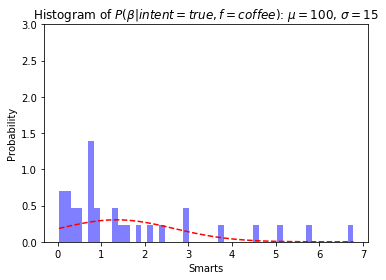

In [10]:
num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(P_beta_11, num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
data = P_beta_11
data = data[abs(data - np.mean(data)) < 2 * np.std(data)]
mu, sigma = stats.norm.fit(data)
print mu,sigma
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of $P(\beta|intent=true,f=coffee)$: $\mu=100$, $\sigma=15$')
plt.ylim((0,3)) 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

7.02661343175 19.1972608037


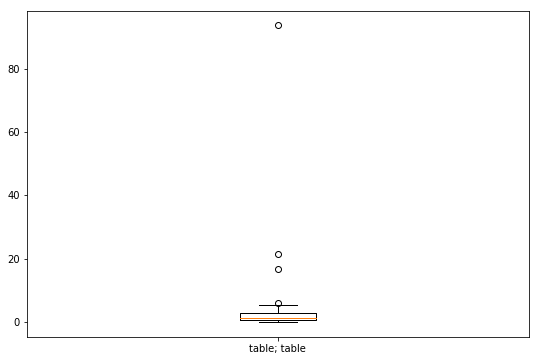

In [107]:
# Plot R = table; H = table
t_t = df.loc[(df['Features known by R'] == 'table')&(df['Features corrected by H'] == 'table')]
mean_t_t = np.mean(t_t['Beta1'])
std_t_t = np.std(t_t['Beta1'])
print mean_t_t, std_t_t

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = t_t['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['table; table'])
plt.show()

0.0630464698077 0.0653463899503


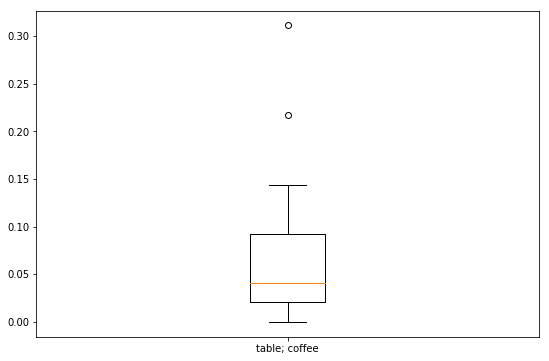

In [108]:
# Plot R = table; H = coffee
t_c = df.loc[(df['Features known by R'] == 'table')&(df['Features corrected by H'] == 'coffee')]
mean_t_c = np.mean(t_c['Beta1'])
std_t_c = np.std(t_c['Beta1'])
print mean_t_c, std_t_c

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = t_c['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['table; coffee'])
plt.show()

0.0236254403074 0.0254809930905


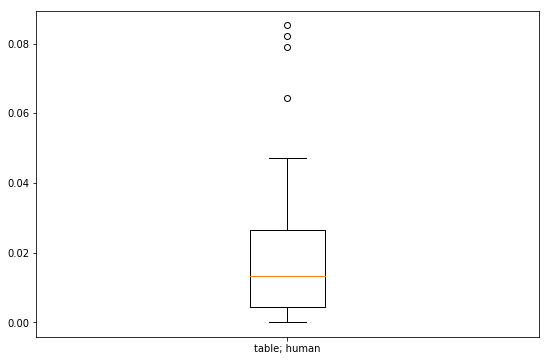

In [109]:
# Plot R = table; H = human
t_h = df.loc[(df['Features known by R'] == 'table')&(df['Features corrected by H'] == 'human')]
mean_t_h = np.mean(t_h['Beta1'])
std_t_h = np.std(t_h['Beta1'])
print mean_t_h, std_t_h

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = t_h['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['table; human'])
plt.show()

3.04389770704 5.7914208055


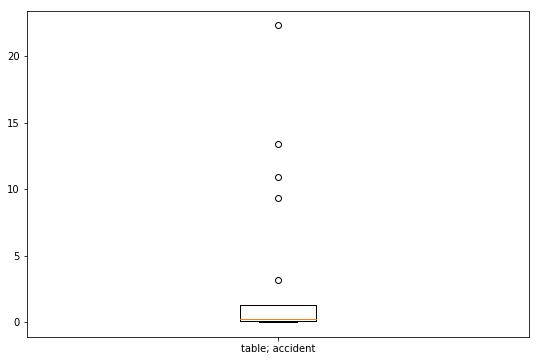

In [111]:
# Plot R = table; H = accident
t_a = df.loc[(df['Features known by R'] == 'table')&(df['Features corrected by H'] == 'accident')]
mean_t_a = np.mean(t_a['Beta1'])
std_t_a = np.std(t_a['Beta1'])
print mean_t_a, std_t_a

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = t_a['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['table; accident'])
plt.show()

0.234357474443 0.461223268765


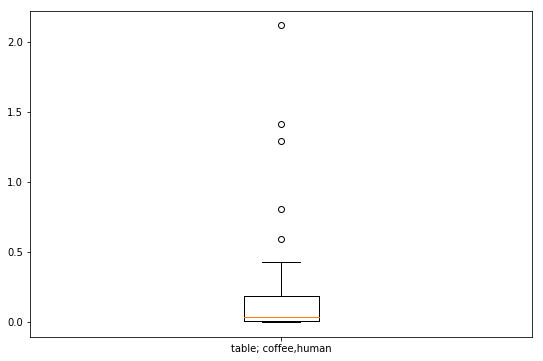

In [110]:
# Plot R = table; H = coffee,human
t_ch = df.loc[(df['Features known by R'] == 'table')&(df['Features corrected by H'] == 'coffee,human')]
mean_t_ch = np.mean(t_ch['Beta1'])
std_t_ch = np.std(t_ch['Beta1'])
print mean_t_ch, std_t_ch

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = t_ch['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['table; coffee,human'])
plt.show()

2.22775317492 2.28382893362 0.0647908927077 0.0855383723398


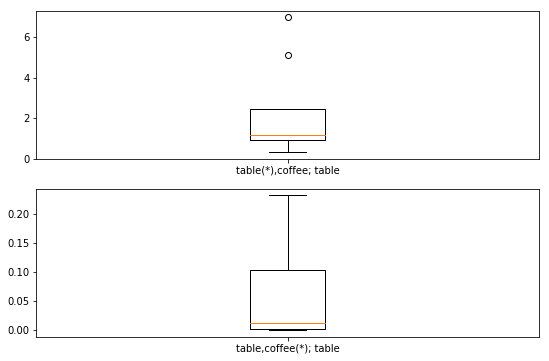

In [117]:
# Plot R = table,coffee; H = table
tc_t = df.loc[(df['Features known by R'] == 'table,coffee')&(df['Features corrected by H'] == 'table')]
mean_tc_t_1 = np.mean(tc_t['Beta1'])
std_tc_t_1 = np.std(tc_t['Beta1'])
mean_tc_t_2 = np.mean(tc_t['Beta2'])
std_tc_t_2 = np.std(tc_t['Beta2'])
print mean_tc_t_1, std_tc_t_1, mean_tc_t_2, std_tc_t_2

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax1 = fig.add_subplot(211)

# Create the boxplot
data = tc_t['Beta1']

bp1 = ax1.boxplot(data)
ax1.set_xticklabels(['table(*),coffee; table'])

# Create an axes instance
ax2 = fig.add_subplot(212)

# Create the boxplot
data = tc_t['Beta2']

bp2 = ax2.boxplot(data)
ax2.set_xticklabels(['table,coffee(*); table'])
plt.show()

0.0521824497733 0.0460919120058 0.102652124846 0.0657996620059


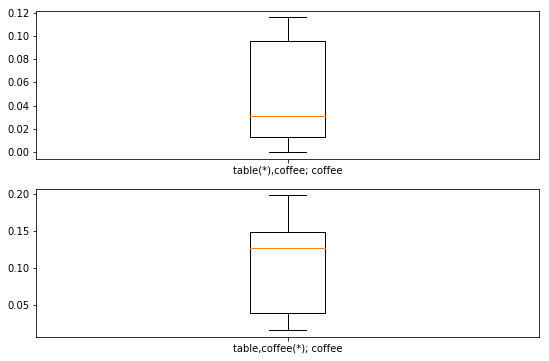

In [118]:
# Plot R = table,coffee; H = coffee
tc_c = df.loc[(df['Features known by R'] == 'table,coffee')&(df['Features corrected by H'] == 'coffee')]
mean_tc_c_1 = np.mean(tc_c['Beta1'])
std_tc_c_1 = np.std(tc_c['Beta1'])
mean_tc_c_2 = np.mean(tc_c['Beta2'])
std_tc_c_2 = np.std(tc_c['Beta2'])
print mean_tc_c_1, std_tc_c_1, mean_tc_c_2, std_tc_c_2

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax1 = fig.add_subplot(211)

# Create the boxplot
data = tc_c['Beta1']

bp1 = ax1.boxplot(data)
ax1.set_xticklabels(['table(*),coffee; coffee'])

# Create an axes instance
ax2 = fig.add_subplot(212)

# Create the boxplot
data = tc_c['Beta2']

bp2 = ax2.boxplot(data)
ax2.set_xticklabels(['table,coffee(*); coffee'])
plt.show()

0.0305889155069 0.0277359783637 1.65459702363 1.09586026703


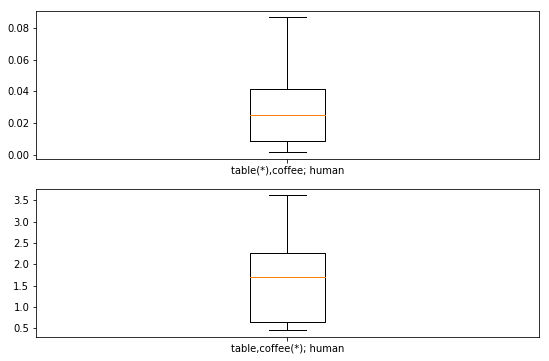

In [119]:
# Plot R = table,coffee; H = human
tc_h = df.loc[(df['Features known by R'] == 'table,coffee')&(df['Features corrected by H'] == 'human')]
mean_tc_h_1 = np.mean(tc_h['Beta1'])
std_tc_h_1 = np.std(tc_h['Beta1'])
mean_tc_h_2 = np.mean(tc_h['Beta2'])
std_tc_h_2 = np.std(tc_h['Beta2'])
print mean_tc_h_1, std_tc_h_1, mean_tc_h_2, std_tc_h_2

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax1 = fig.add_subplot(211)

# Create the boxplot
data = tc_h['Beta1']

bp1 = ax1.boxplot(data)
ax1.set_xticklabels(['table(*),coffee; human'])

# Create an axes instance
ax2 = fig.add_subplot(212)

# Create the boxplot
data = tc_h['Beta2']

bp2 = ax2.boxplot(data)
ax2.set_xticklabels(['table,coffee(*); human'])
plt.show()

3.54813711346 6.40134662979 0.563311707648 0.729882085012


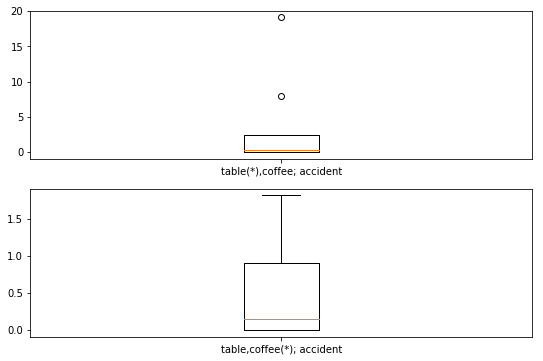

In [120]:
# Plot R = table,coffee; H = accident
tc_a = df.loc[(df['Features known by R'] == 'table,coffee')&(df['Features corrected by H'] == 'accident')]
mean_tc_a_1 = np.mean(tc_a['Beta1'])
std_tc_a_1 = np.std(tc_a['Beta1'])
mean_tc_a_2 = np.mean(tc_a['Beta2'])
std_tc_a_2 = np.std(tc_a['Beta2'])
print mean_tc_a_1, std_tc_a_1, mean_tc_a_2, std_tc_a_2

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax1 = fig.add_subplot(211)

# Create the boxplot
data = tc_a['Beta1']

bp1 = ax1.boxplot(data)
ax1.set_xticklabels(['table(*),coffee; accident'])

# Create an axes instance
ax2 = fig.add_subplot(212)

# Create the boxplot
data = tc_a['Beta2']

bp2 = ax2.boxplot(data)
ax2.set_xticklabels(['table,coffee(*); accident'])
plt.show()

0.508736382376 0.483283283953 0.164256395183 0.196118470427


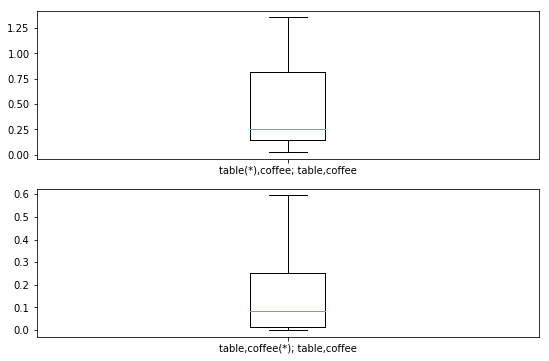

In [121]:
# Plot R = table,coffee; H = table,coffee
tc_tc = df.loc[(df['Features known by R'] == 'table,coffee')&(df['Features corrected by H'] == 'table,coffee')]
mean_tc_tc_1 = np.mean(tc_tc['Beta1'])
std_tc_tc_1 = np.std(tc_tc['Beta1'])
mean_tc_tc_2 = np.mean(tc_tc['Beta2'])
std_tc_tc_2 = np.std(tc_tc['Beta2'])
print mean_tc_tc_1, std_tc_tc_1, mean_tc_tc_2, std_tc_tc_2

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax1 = fig.add_subplot(211)

# Create the boxplot
data = tc_tc['Beta1']

bp1 = ax1.boxplot(data)
ax1.set_xticklabels(['table(*),coffee; table,coffee'])

# Create an axes instance
ax2 = fig.add_subplot(212)

# Create the boxplot
data = tc_tc['Beta2']

bp2 = ax2.boxplot(data)
ax2.set_xticklabels(['table,coffee(*); table,coffee'])
plt.show()

0.877641086235 1.50344506496 2.15541328496 2.24737001707


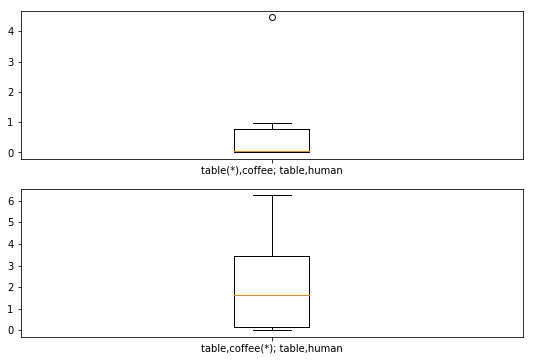

In [122]:
# Plot R = table,coffee; H = table,human
tc_th = df.loc[(df['Features known by R'] == 'table,coffee')&(df['Features corrected by H'] == 'table,human')]
mean_tc_th_1 = np.mean(tc_th['Beta1'])
std_tc_th_1 = np.std(tc_th['Beta1'])
mean_tc_th_2 = np.mean(tc_th['Beta2'])
std_tc_th_2 = np.std(tc_th['Beta2'])
print mean_tc_th_1, std_tc_th_1, mean_tc_th_2, std_tc_th_2

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax1 = fig.add_subplot(211)

# Create the boxplot
data = tc_th['Beta1']

bp1 = ax1.boxplot(data)
ax1.set_xticklabels(['table(*),coffee; table,human'])

# Create an axes instance
ax2 = fig.add_subplot(212)

# Create the boxplot
data = tc_th['Beta2']

bp2 = ax2.boxplot(data)
ax2.set_xticklabels(['table,coffee(*); table,human'])
plt.show()

0.301459009132 0.660894942635 2.76502306816 3.58824311871


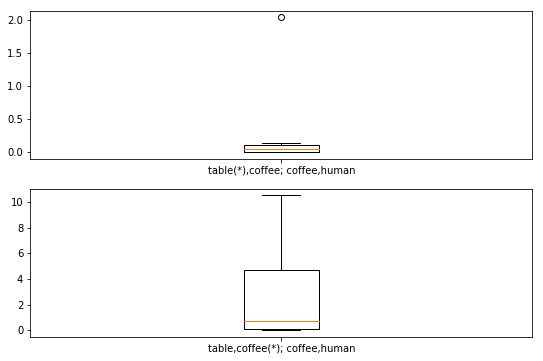

In [123]:
# Plot R = table,coffee; H = coffee,human
tc_ch = df.loc[(df['Features known by R'] == 'table,coffee')&(df['Features corrected by H'] == 'coffee,human')]
mean_tc_ch_1 = np.mean(tc_ch['Beta1'])
std_tc_ch_1 = np.std(tc_ch['Beta1'])
mean_tc_ch_2 = np.mean(tc_ch['Beta2'])
std_tc_ch_2 = np.std(tc_ch['Beta2'])
print mean_tc_ch_1, std_tc_ch_1, mean_tc_ch_2, std_tc_ch_2

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax1 = fig.add_subplot(211)

# Create the boxplot
data = tc_ch['Beta1']

bp1 = ax1.boxplot(data)
ax1.set_xticklabels(['table(*),coffee; coffee,human'])

# Create an axes instance
ax2 = fig.add_subplot(212)

# Create the boxplot
data = tc_ch['Beta2']

bp2 = ax2.boxplot(data)
ax2.set_xticklabels(['table,coffee(*); coffee,human'])
plt.show()

0.0522347557691 0.0652290509102


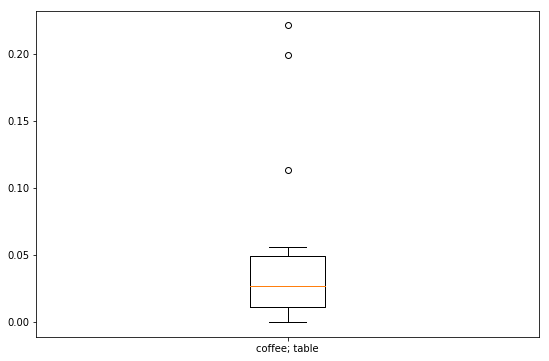

In [2]:
# Plot R = coffee; H = table
c_t = df.loc[(df['Features known by R'] == 'coffee')&(df['Features corrected by H'] == 'table')]
mean_c_t = np.mean(c_t['Beta1'])
std_c_t = np.std(c_t['Beta1'])
print mean_c_t, std_c_t

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = c_t['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['coffee; table'])
plt.show()

0.319246408688 0.680206760657


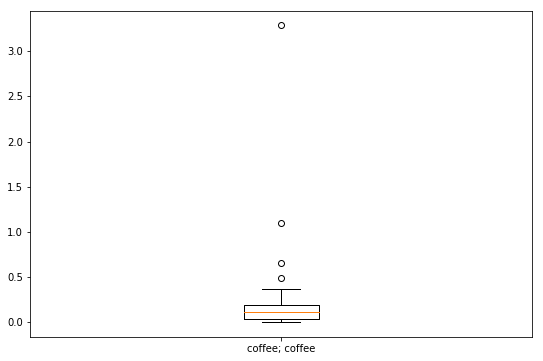

In [3]:
# Plot R = coffee; H = coffee
c_c = df.loc[(df['Features known by R'] == 'coffee')&(df['Features corrected by H'] == 'coffee')]
mean_c_c = np.mean(c_c['Beta1'])
std_c_c = np.std(c_c['Beta1'])
print mean_c_c, std_c_c

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = c_c['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['coffee; coffee'])
plt.show()

0.969479028512 1.20405652266


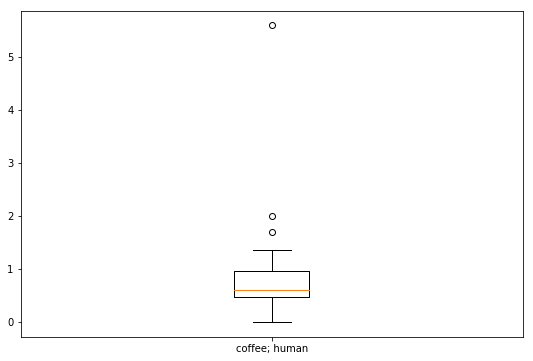

In [4]:
# Plot R = coffee; H = human
c_h = df.loc[(df['Features known by R'] == 'coffee')&(df['Features corrected by H'] == 'human')]
mean_c_h = np.mean(c_h['Beta1'])
std_c_h = np.std(c_h['Beta1'])
print mean_c_h, std_c_h

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = c_h['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['coffee; human'])
plt.show()

0.117146942823 0.157266347618


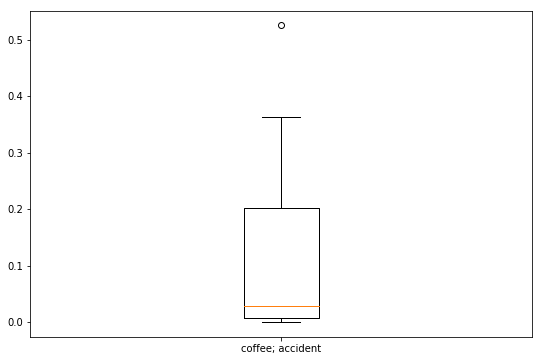

In [5]:
# Plot R = coffee; H = accident
c_a = df.loc[(df['Features known by R'] == 'coffee')&(df['Features corrected by H'] == 'accident')]
mean_c_a = np.mean(c_a['Beta1'])
std_c_a = np.std(c_a['Beta1'])
print mean_c_a, std_c_a

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = c_a['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['coffee; accident'])
plt.show()

1.59734804329 3.54105783119


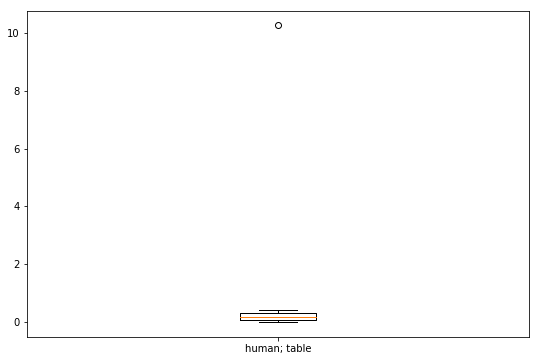

In [6]:
# Plot R = human; H = table
h_t = df.loc[(df['Features known by R'] == 'human')&(df['Features corrected by H'] == 'table')]
mean_h_t = np.mean(h_t['Beta1'])
std_h_t = np.std(h_t['Beta1'])
print mean_h_t, std_h_t

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = h_t['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['human; table'])
plt.show()

0.599796621108 0.59416245082


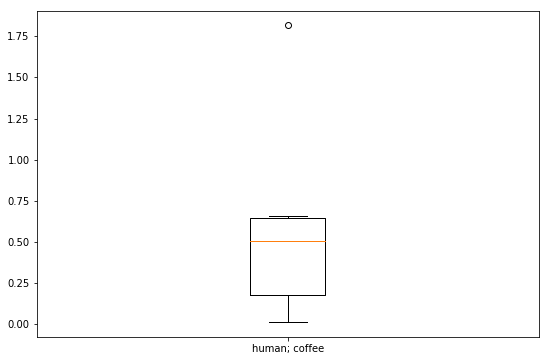

In [7]:
# Plot R = human; H = coffee
h_c = df.loc[(df['Features known by R'] == 'human')&(df['Features corrected by H'] == 'coffee')]
mean_h_c = np.mean(h_c['Beta1'])
std_h_c = np.std(h_c['Beta1'])
print mean_h_c, std_h_c

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = h_c['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['human; coffee'])
plt.show()

0.579812984352 0.710736286915


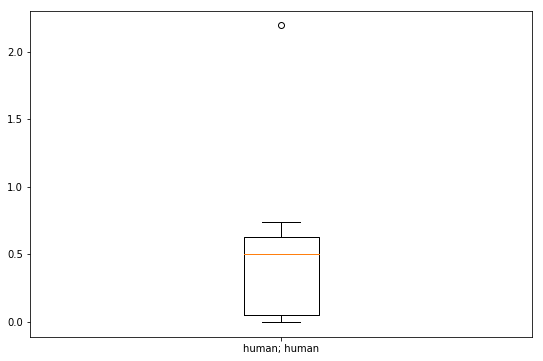

In [8]:
# Plot R = human; H = human
h_h = df.loc[(df['Features known by R'] == 'human')&(df['Features corrected by H'] == 'human')]
mean_h_h = np.mean(h_h['Beta1'])
std_h_h = np.std(h_h['Beta1'])
print mean_h_h, std_h_h

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = h_h['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['human; human'])
plt.show()

1.54780138977 0.866781325581


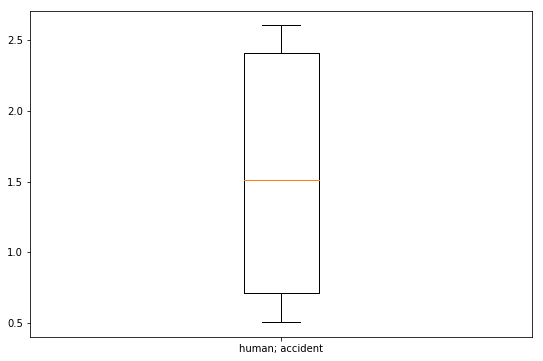

In [9]:
# Plot R = human; H = accident
h_a = df.loc[(df['Features known by R'] == 'human')&(df['Features corrected by H'] == 'accident')]
mean_h_a = np.mean(h_a['Beta1'])
std_h_a = np.std(h_a['Beta1'])
print mean_h_a, std_h_a

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = h_a['Beta1']

bp = ax.boxplot(data)
ax.set_xticklabels(['human; accident'])
plt.show()

[6       0.303613
7       0.830644
8       1.655595
9       1.153620
10      0.082355
11      0.008433
33      0.393887
34      0.677334
35      0.143495
86      6.136937
87     16.721037
88      2.714166
89      1.142828
90      0.939170
138     5.490967
139     0.750306
140     0.480656
141     2.867296
144     1.252363
145    93.636490
189     1.647887
190    21.619693
191     0.963336
Name: Beta1, dtype: float64, 18     0.112106
19     0.002563
20     0.024204
21     0.023144
22     0.039690
24     0.020776
25     0.311259
26     0.034079
50     0.082371
51     0.115431
52     0.143472
53     0.093606
54     0.117575
55     0.003835
56     0.063092
57     0.217230
58     0.031717
59     0.106418
60     0.051878
61     0.054477
62     0.039832
63     0.003088
106    0.004545
107    0.079861
108    0.089863
109    0.041816
110    0.057550
111    0.000001
112    0.000596
113    0.034779
182    0.104859
183    0.001326
184    0.010358
185    0.026182
Name: Beta1, dtype: float64, 14    

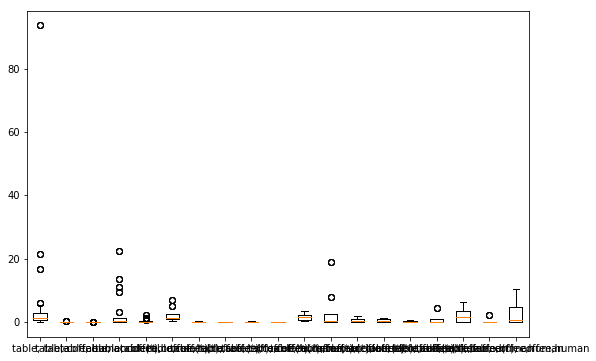

In [106]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
data = [t_t['Beta1'],t_c['Beta1'],t_h['Beta1'],t_a['Beta1'],t_ch['Beta1'],tc_t['Beta1'],tc_t['Beta2'],tc_c['Beta1'],tc_c['Beta2'],tc_h['Beta1'],tc_h['Beta2'],tc_a['Beta1'],tc_a['Beta2'],tc_tc['Beta1'],tc_tc['Beta2'],tc_th['Beta1'],tc_th['Beta2'],tc_ch['Beta1'],tc_ch['Beta2']]
print data
bp = ax.boxplot(data)
ax.set_xticklabels(['table; table', 'table; coffee', 'table; human', 'table; accident', 'table; coffee,human', 'table(*),coffee; table', 'table,coffee(*); table', 'table(*),coffee; coffee', 'table,coffee(*); coffee', 'table(*),coffee; human', 'table,coffee(*); human', 'table(*),coffee; accident', 'table,coffee(*); accident', 'table(*),coffee; table,coffee', 'table,coffee(*); table,coffee', 'table(*),coffee; table,human', 'table,coffee(*); table,human', 'table(*),coffee; coffee,human', 'table,coffee(*); coffee,human'])
plt.show()
